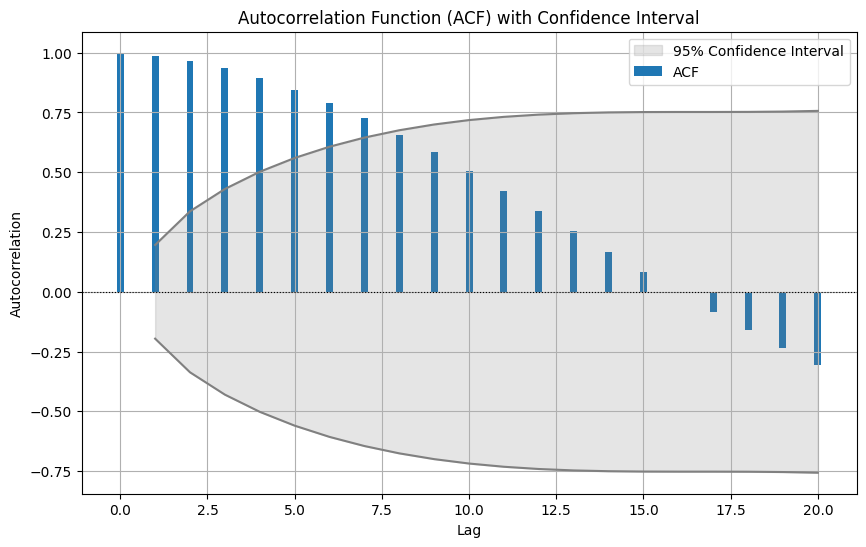

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf

n = 100
# Generate some sample time series data
np.random.seed(0)
t = np.linspace(0, 10, n)
time_series = np.sin(t)

# Calculate the ACF with confidence intervals using statsmodels
acf_values, confint = acf(time_series, alpha=0.05)

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

# Create lag values for the x-axis
lags = np.arange(0, len(acf_values))

# Plot the ACF with confidence intervals using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(lags, acf_values, width=0.2, align='center', label='ACF')

# Fill the area between upper and lower bounds
plt.fill_between(lags[1:], lower_bound, upper_bound, color='grey', alpha=0.2, label='95% Confidence Interval')

# Plot the upper and lower bounds
plt.plot(lags[1:], upper_bound, color='grey')
plt.plot(lags[1:], lower_bound, color='grey')

plt.axhline(y=0, color='black', linewidth=0.8, linestyle='dotted')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()